### How to create a good title for video?

In [114]:
import pandas as pd

british_youtube = pd.read_csv("GBvideos.csv")
canadian_youtube = pd.read_csv("CAvideos.csv")
us_youtube = pd.read_csv("USvideos.csv")

videos = pd.concat([canadian_youtube, british_youtube,us_youtube])
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


### What makes videos popular?

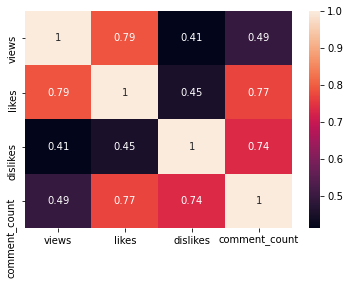

In [115]:
import seaborn as sn
import matplotlib.pyplot as plt


class CorrelationMatrix:
    def __init__(self, df):
        self.df = df

    def draw(self):
        corr_matrix = self.df[['views', 'likes', 'dislikes', 'comment_count']].corr()
        sn.heatmap(corr_matrix, annot=True)
        plt.show()


CorrelationMatrix(videos).draw()

In [116]:
class YoutubeNormalizer:

    def __init__(self, csv):
        self.csv = csv

    def decide_about_popular(self):
        lots_views = self.csv.views.quantile(0.8)
        comments_median = self.csv.comment_count.quantile(0.6)
        lots_of_dislike = self.csv.dislikes.quantile(0.8)
        self.csv['popular'] = 0
        self.csv.loc[(comments_median < self.csv.comment_count) & (self.csv.views > lots_views), 'popular'] = 1
        self.csv.loc[(self.csv.dislikes > lots_of_dislike) & (self.csv.likes > self.csv.dislikes), 'popular'] = 1

    def get_normalized_data(self):
        self.csv.drop_duplicates(subset="title", keep='first', inplace=True)
        self.decide_about_popular()
        title_with_popular = self.csv[['title', 'popular']]
        return title_with_popular


normalized_data = YoutubeNormalizer(videos).get_normalized_data()
normalized_data.head()

,title,popular
0,Eminem - Walk On Water (Audio) ft. Beyoncé,1
1,PLUSH - Bad Unboxing Fan Mail,1
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",1
3,I Dare You: GOING BALD!?,1
4,Ed Sheeran - Perfect (Official Music Video),1


### Classification and metrics

In [119]:
class Classification:
    def __init__(self, train_df, test_df, vectorizer, strategy):
        self.train_df = train_df
        self.test_df = test_df
        self.vectorizer = vectorizer
        if strategy == 'LogisticRegression':
            self.model = LogisticRegression(class_weight='balanced', dual=False)
        elif strategy == 'NAIVE BAYES':
            self.model = naive_bayes.MultinomialNB()
        elif strategy == 'SVM':
            self.model = svm.SVC()
        elif strategy == 'RANDOM FORREST':
            self.model = ensemble.RandomForestClassifier()

    def train(self):
        transformed = vectorizer.transform(self.train_df['title'])
        self.model.fit(transformed, self.train_df['popular'])

    def show_model_statistic(self):
        vectorized = vectorizer.transform(self.test_df['title'])
        predicted = self.model.predict(vectorized)
        target = self.test_df['popular']
        print(metrics.classification_report(target, predicted, digits=4))

### Logistic Regression

In [120]:
logistic_regression_classification = Classification(train_df=train_title_popularity, test_df=test_title_popularity, vectorizer=vectorizer,
                                                    strategy='LogisticRegression')
logistic_regression_classification.train()
logistic_regression_classification.show_model_statistic()

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      2337
           1     0.2363    0.9959    0.3819       726

    accuracy                         0.2360      3063
   macro avg     0.1181    0.4979    0.1910      3063
weighted avg     0.0560    0.2360    0.0905      3063



### NAIVE BAYES

In [121]:
naive_bayes_classification = Classification(train_df=train_title_popularity, test_df=test_title_popularity, vectorizer=vectorizer,
               strategy='NAIVE BAYES')
naive_bayes_classification.train()
naive_bayes_classification.show_model_statistic()

              precision    recall  f1-score   support

           0     0.7630    1.0000    0.8656      2337
           1     0.0000    0.0000    0.0000       726

    accuracy                         0.7630      3063
   macro avg     0.3815    0.5000    0.4328      3063
weighted avg     0.5821    0.7630    0.6604      3063



### SVM

In [122]:
svm_classification = Classification(train_df=train_title_popularity, test_df=test_title_popularity, vectorizer=vectorizer,
               strategy='SVM')
svm_classification.train()
svm_classification.show_model_statistic()

              precision    recall  f1-score   support

           0     0.7630    1.0000    0.8656      2337
           1     0.0000    0.0000    0.0000       726

    accuracy                         0.7630      3063
   macro avg     0.3815    0.5000    0.4328      3063
weighted avg     0.5821    0.7630    0.6604      3063



### RANDOM FORREST

In [123]:
random_forest_tree = Classification(train_df=train_title_popularity, test_df=test_title_popularity, vectorizer=vectorizer,
               strategy='RANDOM FORREST')
random_forest_tree.train()
random_forest_tree.show_model_statistic()

              precision    recall  f1-score   support

           0     0.7630    1.0000    0.8656      2337
           1     0.0000    0.0000    0.0000       726

    accuracy                         0.7630      3063
   macro avg     0.3815    0.5000    0.4328      3063
weighted avg     0.5821    0.7630    0.6604      3063

